<h1 align='center' >Task 2: Prediction Unsupervised Machine Learning</h1>

<h3 align='right' style='color:green'>Venkat Revanth Thota</h3>

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Iris.csv')
iris_df = df.drop(columns=['Id','Species'])
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
x = iris_df.values
x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Number of clusters: 1, WCSS: 680.8244
Number of clusters: 2, WCSS: 152.36870647733906
Number of clusters: 3, WCSS: 78.94084142614602
Number of clusters: 4, WCSS: 57.31787321428571
Number of clusters: 5, WCSS: 46.535582051282056
Number of clusters: 6, WCSS: 38.930963049671746
Number of clusters: 7, WCSS: 34.19698216257427
Number of clusters: 8, WCSS: 30.083825236167343
Number of clusters: 9, WCSS: 28.032802662999597


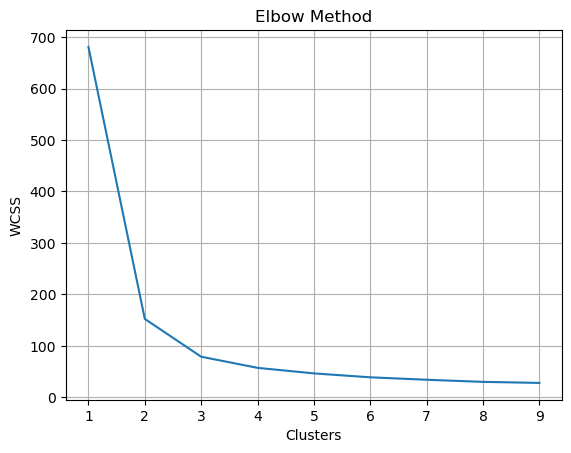

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

k = 10
wcss = []

for i in range(1,k):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print(f'Number of clusters: {i}, WCSS: {kmeans.inertia_}')

plt.plot(range(1,k),wcss)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

* Either 2 or 3 will be the number of clusters

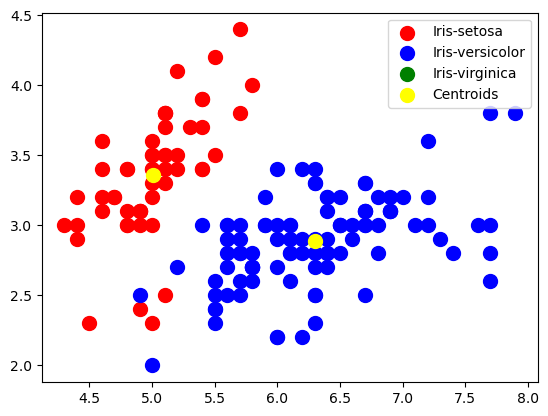

In [6]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

# species
i_setosa = df.Species.unique()[0]
i_versicolor = df.Species.unique()[1]
i_virginica = df.Species.unique()[-1]

# visualizing
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1],
           s = 100, c = 'red', label = i_setosa)
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1],
           s = 100, c = 'blue', label = i_versicolor)
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1],
           s = 100, c = 'green', label = i_virginica)

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

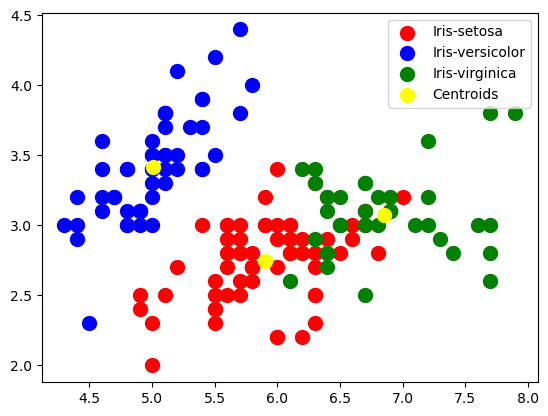

In [7]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

# species
i_setosa = df.Species.unique()[0]
i_versicolor = df.Species.unique()[1]
i_virginica = df.Species.unique()[-1]

# visualizing
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1],
           s = 100, c = 'red', label = i_setosa)
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1],
           s = 100, c = 'blue', label = i_versicolor)
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1],
           s = 100, c = 'green', label = i_virginica)

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

* Most optimum number of clusters are __`3`__.
* Based this we can predict each plant's species.